In [143]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.integrate

from matplotlib import animation
from IPython.display import HTML, display
from ipywidgets import interact

%matplotlib inline
import matplotlib; matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['animation.writer'] = 'avconv'

# Definition - Convolution

A convolution of two functions can be thought of as a way to express how the shape of one function is modified by another. <br>
<br>
The convolution $(f*g)(t)$ can be thought of as a weighted sum of the function f where the weight is g(t) shifted and reflected. The convolution acts as a sliding weighted sum (like the sliding window in CNN) as t varies from negative to positive infinity

## Convolution: discrete case

The convolution $(f_1*f_2)(t)$ of two functions on a discrete domain $f_1(t)$ and $f_2(t)$ is defined by the following sum:

$$
(f_1*f_2)(t) = \sum_{\tau \ = -\infty}^{\infty}f_1(\tau)f_2(t-\tau)
$$

The convolution of two discrete functions is a function of the variable t. Let's define two functions $f_1(t)$ and $f_2(t)$:

Let's plot these two functions to see how they look like:

In [145]:
Fs = 10  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples

In [147]:
# f1 - standard normal gaussian function
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

f1_t = []
for val in t:
    f1_t.append(gaussian(val, 0, 1))

# f2 - step/rectangle function with constant value zero in the interval (-1, 1)
f2_t = np.zeros((len(t)))
f2_t[(t < 1) & (t > -1)] = 1

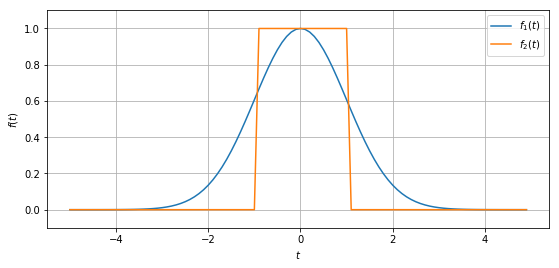

In [148]:
plt.figure(figsize=(9,4))
plt.plot(t, f1_t, label='$f_1(t)$')
plt.plot(t, f2_t, label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); 
plt.xlabel('$t$'); 
plt.legend(fontsize=10); 
plt.ylim((-0.1, 1.1));

We can numerically compute the convolution for different values of t <br>
<br>
If t = 1:

$$
(f_1*f_2)(1) = \sum_{\tau \ = -\infty}^{\infty}f_1(\tau)f_2(1-\tau)
$$

This shifts $f_2$ to the right by t=1 and reflects it across the y-axis <br>
<br>
We let $\tau$ vary and the weight function "slides" like the window in a CNN

In [151]:
def convolve(t):
    tau_values = np.arange(-100, 100, 0.1) # discrete domain
    f1_tau = np.array([gaussian(tau, 0, 1) for tau in tau_values])
    f2_tau = np.array([1 if abs(t - tau) < 1 else 0 for tau in tau_values])
    f1_conv_f2 = np.sum(f1_tau*f2_tau) # convolution
    print("(f_1*f_2)(" + str(t) + ") = " + str(f1_conv_f2))
    
    plt.figure(figsize=(9,4))
    plt.plot(tau_values, f1_tau, label=r'$f_1(\tau)$')
    plt.plot(tau_values, f2_tau, label=r'$f_2(t - \tau)$')
    plt.grid(True); 
    plt.title('$t = $' + str(t))
    plt.ylabel(r'$f(\tau)$'); 
    plt.xlabel(r'$\tau$'); 
    plt.legend(fontsize=10); 
    plt.ylim((-0.1, 1.5));
    plt.xlim((-5, 5));

(f_1*f_2)(-2) = 4.245550020967341
(f_1*f_2)(-1) = 12.3929572802439
(f_1*f_2)(0) = 17.102375621494513
(f_1*f_2)(1) = 11.528292563578711
(f_1*f_2)(2) = 3.6501283578606047


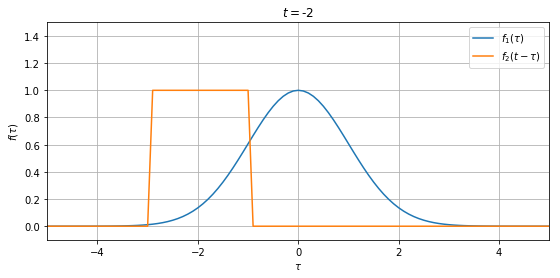

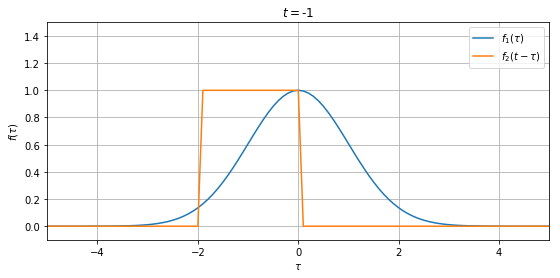

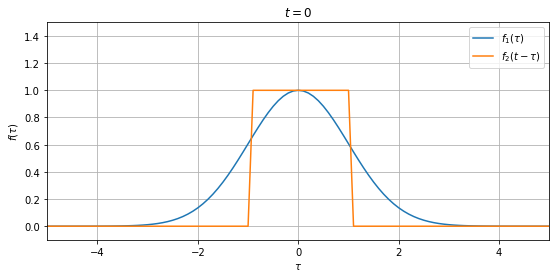

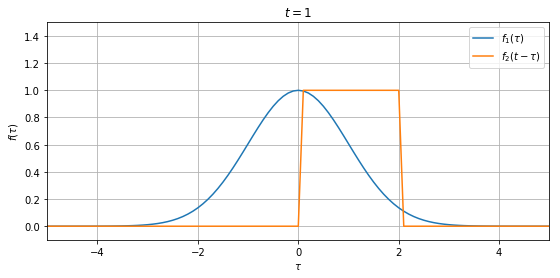

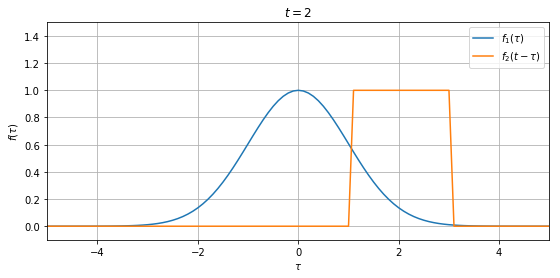

In [152]:
for i in np.arange(-2, 3):
    convolve(i)

# Convolution Examples and the Convolution Integral

In this notebook, we will illustrate the operation of convolution and how we can calculate it numerically. Formally, the convolution $(f_1*f_2)(t)$ of two signals $f_1(t)$ and $f_2(t)$ is defined by the convolution integral

$$
(f_1*f_2)(t) = \int_{-\infty}^{\infty}f_1(\tau)f_2(t-\tau)d\tau.
$$

So, the convolution of two function is the integral over the product of both functions, where one function is time-shifted and flipped in time. Let us not think about why this operation makes sense for now. Instead, let's define two functions $f_1(t)$ and $f_2(t)$:

In [173]:
f1 = lambda t: np.maximum(0, 1-abs(t))
f2 = lambda t: (t>0) * np.exp(-2*t)

Let's plot these two functions to see how they look like:

In [174]:
Fs = 50  # our sampling frequency for the plotting
T = 5    # the time range we are interested in
t = np.arange(-T, T, 1/Fs)  # the time samples

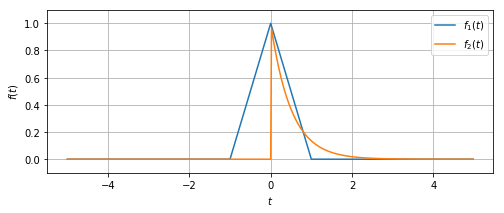

In [175]:
plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); 
plt.ylabel('$f(t)$'); 
plt.xlabel('$t$'); 
plt.legend(fontsize=10); 
plt.ylim((-0.1, 1.1));

So, we see one function is a triangle, the other is the exponential impulse. Let us now evaluate the convolution integral at a given time $t_0=1$:

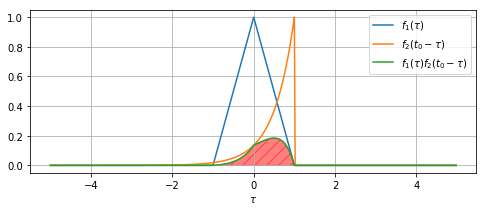

In [176]:
t0 = 1
flipped = lambda tau: f2(t0-tau)
product = lambda tau: f1(tau)*f2(t0-tau)

plt.figure(figsize=(8,3))
plt.gca().set_ymargin(0.05);
plt.plot(t, f1(t), label=r'$f_1(\tau)$')
plt.plot(t, flipped(t), label=r'$f_2(t_0-\tau)$')
plt.plot(t, product(t), label=r'$f_1(\tau)f_2(t_0-\tau)$')
plt.fill(t, product(t), color='r', alpha=0.5, hatch='//')
plt.grid(True); plt.xlabel(r'$\tau$'); plt.legend(fontsize=10);

# Explicitely calculate the integral, using the Simpson integration rule
display(HTML("Result of the convolution (red shaded area): $(f_1*f_2)(t_0=%.0f) = %.2f$" % (t0, scipy.integrate.simps(product(t), t))))

As we see, the green curve $f_2(t_0-\tau)$ was shifted by $t_0$ to the right, and then horizontally mirrored. The value of the convolution integral corresponds to the red shaded area, which is the product of both curves. 

We can now write a small function which illustrates the convolution integral for different time-shifts.

In [177]:
def showConvolution(f1, f2, t0):
    # Calculate the overall convolution result using Simpson integration
    convolution = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: f1(tau) * f2(t_-tau)
        convolution[n] = scipy.integrate.simps(prod(t), t)
    
    # Create the shifted and flipped function
    f_shift = lambda t: f2(t0-t)
    prod = lambda tau: f1(tau) * f2(t0-tau)

    # Plot the curves
    plt.gcf().clear()
    
    plt.subplot(211)
    plt.gca().set_ymargin(0.05)
    plt.plot(t, f1(t), label=r'$f_1(\tau)$')
    plt.plot(t, f_shift(t), label=r'$f_2(t_0-\tau)$')
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//')
    plt.plot(t, prod(t), 'r-', label=r'$f_1(\tau)f_2(t_0-\tau)$')
    plt.grid(True); plt.xlabel(r'$\tau$'); plt.ylabel(r'$x(\tau)$')
    plt.legend(fontsize=10)
    plt.text(-4, 0.6, '$t_0=%.2f$' % t0, bbox=dict(fc='white'))
    
    # plot the convolution curve
    plt.subplot(212)
    plt.gca().set_ymargin(0.05)
    plt.plot(t, convolution, label='$(f_1*f_2)(t)$')
    
    # recalculate the value of the convolution integral at the current time-shift t0
    current_value = scipy.integrate.simps(prod(t), t)
    plt.plot(t0, current_value, 'ro')  # plot the point
    plt.grid(True); plt.xlabel('$t$'); plt.ylabel('$(f_1*f_2)(t)$')
    plt.legend(fontsize=10)
    plt.show();

In [178]:
plt.figure();
# animate convolution with given domain for sliding window with step size
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.1));

<Figure size 576x432 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0), Output()), _dom_classes=('w…

The animation shows, how the green function is gradually shifted to the right, producing more and more overlap between both curves and hence increasing the area under their product. Then, when the green curve is shifted even more to the right, we see that the area under their product decreases again. 

Another important property can be seen from the convolution output: Even though the green input signal has a sharp jump at $t=0$, the convolution of both functions is a smooth function. In particular, this property is due to the integral in the convolution calculation: The integral somehow creates a moving average filter, which cannot create immediate jumps in the output signal (as long as the input does not contain Dirac-impulses). So, a general property of the convolution, is the fact that the convolution product of two functions is always a smoother curve than the input signals.

Let us now look at the classical example for convolution explanation: The convolution of a rectangular function with itself. Here, the result is a triangle with a maximum, when both rectangles perfectly overlap:

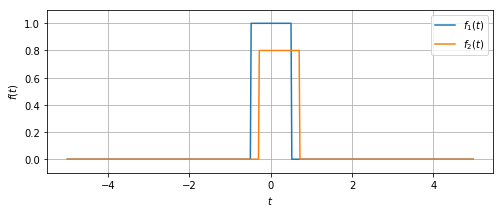

In [162]:
f1 = lambda t: (abs(t)<0.5).astype(float)
f2 = lambda t: 0.8*(abs(t-0.2)<0.5).astype(float)
plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); 
plt.ylabel('$f(t)$'); 
plt.xlabel('$t$'); 
plt.legend(fontsize=10); 
plt.ylim((-0.1, 1.1));

In [165]:
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.2));

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.2), Output()), _dom_c…

Let us finally look at the convolution of an exponentially decaying impulse with a switched-on sine wave. If we understand the blue graph as the impulse response of some LTI (linearly time invariant) system and the green curve as its input signal, then the convolution of both is the output of the signal to this particular input. 

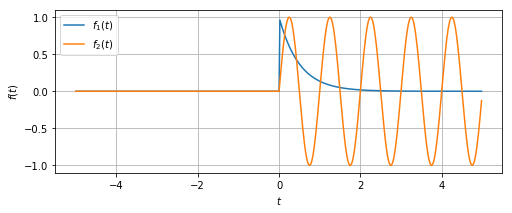

In [170]:
f1 = lambda t: (t>0) * np.exp(-2*t)
f2 = lambda t: np.sin(2*np.pi*t) * (t>0)
plt.figure(figsize=(8,3))
plt.plot(t, f1(t), label='$f_1(t)$')
plt.plot(t, f2(t), label='$f_2(t)$')
plt.grid(True); plt.ylabel('$f(t)$'); 
plt.xlabel('$t$'); 
plt.legend(fontsize=10); 
plt.ylim((-1.1, 1.1));

We see that the impulse response (blue) is causal, i.e. $f_1(t)=0, t<0$. Since the sine-wave is switched on at $t=0$, the output of the system is zero before switching on the signal. Then, after some transient phase, the output of the system becomes a sine-wave with the same frequency but with a different phase and amplitude. This is the fundamental property of LTI systems: The response of an LTI system to a harmonic is a harmonic of the same frequency, but (possibly) with different phase and amplitude. We also say, harmonics are eigenfunctions of the LTI system. Hence, in particular harmonics are eigenfunctions of the convolution integral.

In [171]:
interact(lambda t0: showConvolution(f1, f2, t0), t0 = (-2,3,0.2));

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0, step=0.2), Output()), _dom_c…

## Apply convolution to an image

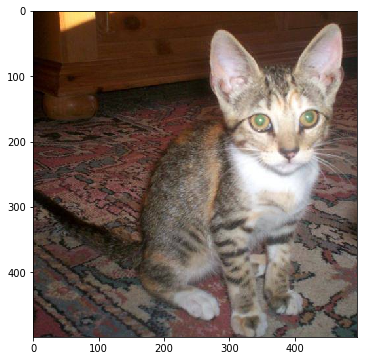

In [382]:
import os
import PIL
import cv2

# training data given just as jpeg image files
import matplotlib.image as img
cat1 = img.imread("C:/Users/dreww/Desktop/ml_project/train/cat.7.jpg")
cat2 = img.imread("C:/Users/dreww/Desktop/ml_project/train/cat.1.jpg")
cat3 = img.imread("C:/Users/dreww/Desktop/ml_project/train/cat.12.jpg")
plt.imshow(cat1)

# pixel height, width
cat1.shape;

In [383]:
from scipy import signal
sig = np.random.randn(1000)
autocorr = signal.fftconvolve(sig, sig[::-1], mode='full')

In [331]:
cat1 = cat1[:,:,0]
cat2 = cat2[:,:,0]
cat3 = cat3[:,:,0]

In [332]:
from scipy import misc
kernel = np.outer(signal.gaussian(20, 8), signal.gaussian(20, 8))
blurred = signal.fftconvolve(cat1, kernel, mode='full')

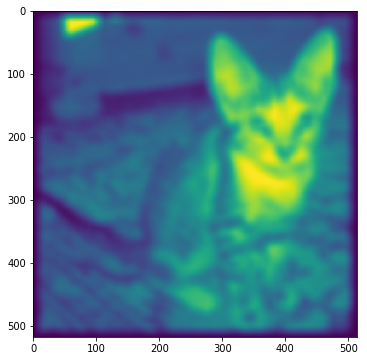

In [333]:
plt.imshow(blurred);

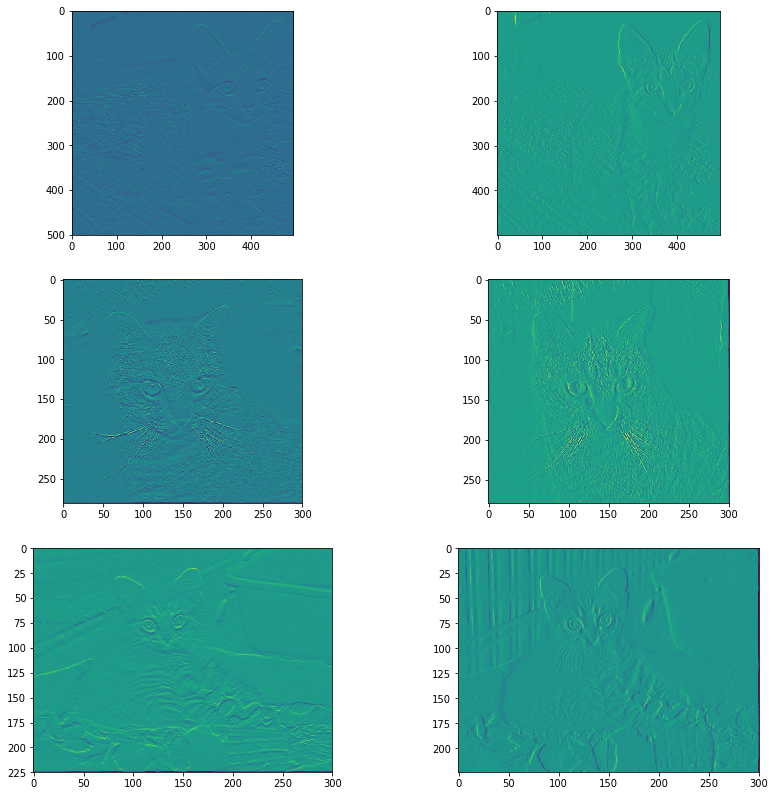

In [317]:
plt.figure(figsize=(14,14))
edges = signal.convolve(cat1, [[1.], [-1.]])
plt.subplot(3, 2, 1)
plt.imshow(edges)
edges2 = signal.convolve(cat1, [[1., -1.]])
plt.subplot(3, 2, 2)
plt.imshow(edges2);
edges = signal.convolve(cat2, [[1.], [-1.]])
plt.subplot(3, 2, 3)
plt.imshow(edges)
edges2 = signal.convolve(cat2, [[1., -1.]])
plt.subplot(3, 2, 4)
plt.imshow(edges2);
edges = signal.convolve(cat3, [[1.], [-1.]])
plt.subplot(3, 2, 5)
plt.imshow(edges)
edges2 = signal.convolve(cat3, [[1., -1.]])
plt.subplot(3, 2, 6)
plt.imshow(edges2);

C:\Users\dreww\AppData\Local\Continuum\anaconda3\envs\python_3_6\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


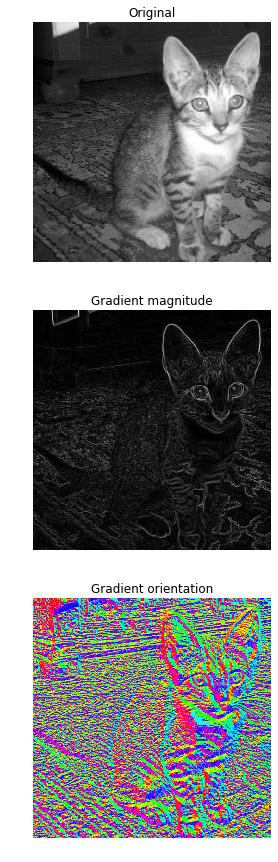

In [256]:
scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
                   [-10+0j, 0+ 0j, +10 +0j],
                   [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
grad = signal.convolve2d(cat, scharr, boundary='symm', mode='same')

fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(3, 1, figsize=(6, 15))
ax_orig.imshow(cat,cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Gradient magnitude')
ax_mag.set_axis_off()
ax_ang.imshow(np.angle(grad), cmap='hsv') # hsv is cyclic, like angles
ax_ang.set_title('Gradient orientation')
ax_ang.set_axis_off()
fig.show()

In [262]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [263]:
# mnist data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

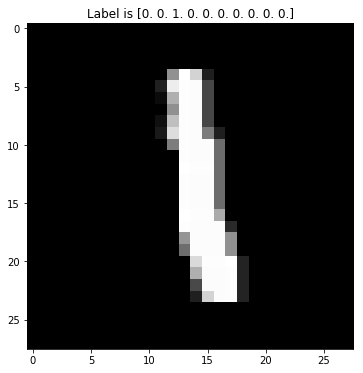

In [341]:
# The pixel intensity values are integers from 0 to 255
pixels = np.array(train_images[6])

# Reshape the array into 28 x 28 array (2-dimensional array)
pixels = pixels.reshape((28, 28))

# Plot
plt.title('Label is {label}'.format(label=train_labels[5]))
plt.imshow(pixels, cmap='gray')
plt.show();

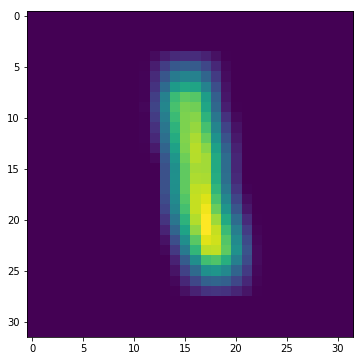

In [381]:
digit = pixels
kernel = np.outer(signal.gaussian(5, 8), signal.gaussian(5, 8))
blurred = signal.fftconvolve(kernel, digit, mode='full')
plt.imshow(blurred);

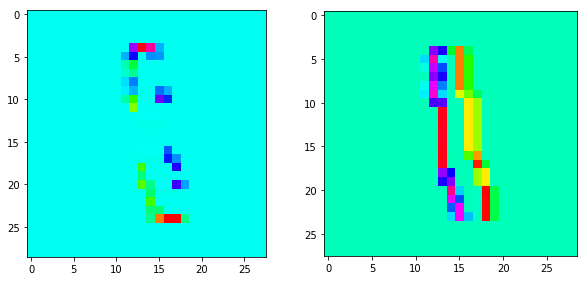

In [345]:
plt.figure(figsize=(10,10))
edges = signal.convolve(pixels, [[1.], [-1.]])
plt.subplot(2, 2, 1)
plt.imshow(edges, 'hsv')
edges2 = signal.convolve(pixels, [[1., -1.]])
plt.subplot(2, 2, 2)
plt.imshow(edges2, 'hsv');

In [349]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import backend as K

model = VGG16(weights='imagenet', include_top=False)
# filter 0 for layer bloack3_conv1
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
# define loss function for this filter that we maximize
loss = K.mean(layer_output[:, :, :, filter_index])

In [350]:
# gradient of the loss with respect to the image input
grads = K.gradients(loss, model.input)[0]
# normalize
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # avoid dividing by zero

In [351]:
# compute loss and gradient values for image input
iterate = K.function([model.input], [loss, grads])
# starting with tensor of zeros as blank image
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [352]:
# stochastic gradient descent/ascent (maximize loss function)
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [353]:
# post-process image to display visually
def deprocess_image(x):
    
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    
    return x

In [354]:
def generate_pattern(layer_name, filter_index, size=150):
    
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]

    return deprocess_image(img)

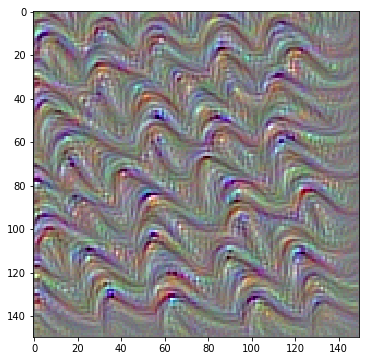

In [392]:
conv_layer = generate_pattern('block4_conv1', 1)
plt.imshow(conv_layer);

## Conclusion
> - The convolution operation is given by the integral over the product of two functions, where one function is flipped and shifted in time.
> - The convolution operation smoothes the input signals, i.e. the output of the convolution is a more smooth function that its input functions.